# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [532]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [533]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [534]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [6,315,254]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12126,3199,6975,480,3140,545
1,1479,14982,11924,662,3891,3508
2,10379,17972,4748,4686,1547,3265


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Client 6 : If you see table below, this client spend about avarage(above 0.5011) on Fresh, grocery and detergent_paper and very less (below 0.4 )on frozen and Deli food, so it seem to me as small **Convenience store** .

Client 315 : This client spend more on almost all the catergories excpet Fresh and Frozen (percentile below 0.3). 
And all other category spending are way above avarage(more than 0.5011) .It seems to be a **Deli/Cafe **.

Client 254 : Looking at number this client spend more on almost all the cateories (more than 0.5011)  so I believe this is a **Retail food**



In [535]:
percentiles = data.rank(pct=True).loc[indices]
percentiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
6,0.645455,0.448864,0.618182,0.175000,0.697727,0.313636
315,0.134091,0.934091,0.795455,0.236364,0.747727,0.931818
254,0.579545,0.952273,0.497727,0.815909,0.609091,0.922727


In [536]:
percentiles_data = data.rank(pct=True)
percentiles_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.501136,0.501136,0.501136,0.501136,0.501136,0.501136
std,0.289003,0.289003,0.289003,0.289003,0.289003,0.289002
min,0.003409,0.002273,0.002273,0.002273,0.003409,0.005682
25%,0.251705,0.251705,0.251705,0.252557,0.251420,0.251705
50%,0.501136,0.501136,0.501136,0.501136,0.501136,0.501136
75%,0.750568,0.750568,0.750568,0.750568,0.750568,0.750568
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [537]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


def predict_score(feature):
    new_data = data.drop([feature], axis = 1)
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25,random_state=42 )
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train,y_train)
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print("score for feature {:16} is {:+.5f}".format(feature ,score))
   
for feature in data.columns.values:
    predict_score(feature)

score for feature Fresh            is -0.38575
score for feature Milk             is +0.15628
score for feature Grocery          is +0.68188
score for feature Frozen           is -0.21014
score for feature Detergents_Paper is +0.27167
score for feature Delicatessen     is -2.25471


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
Fresh, Frozen and Delicatessen has coefficent of determination score negative, This means these features have information unique which can not predicated by any other feature so we should not drop them.

Grocery and Detergents_Paper has positive and high coefficent of determination indicating these are the feature which can be dropped, and information that we get from Grocery and Detergents_Paper can be predicated from other features. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

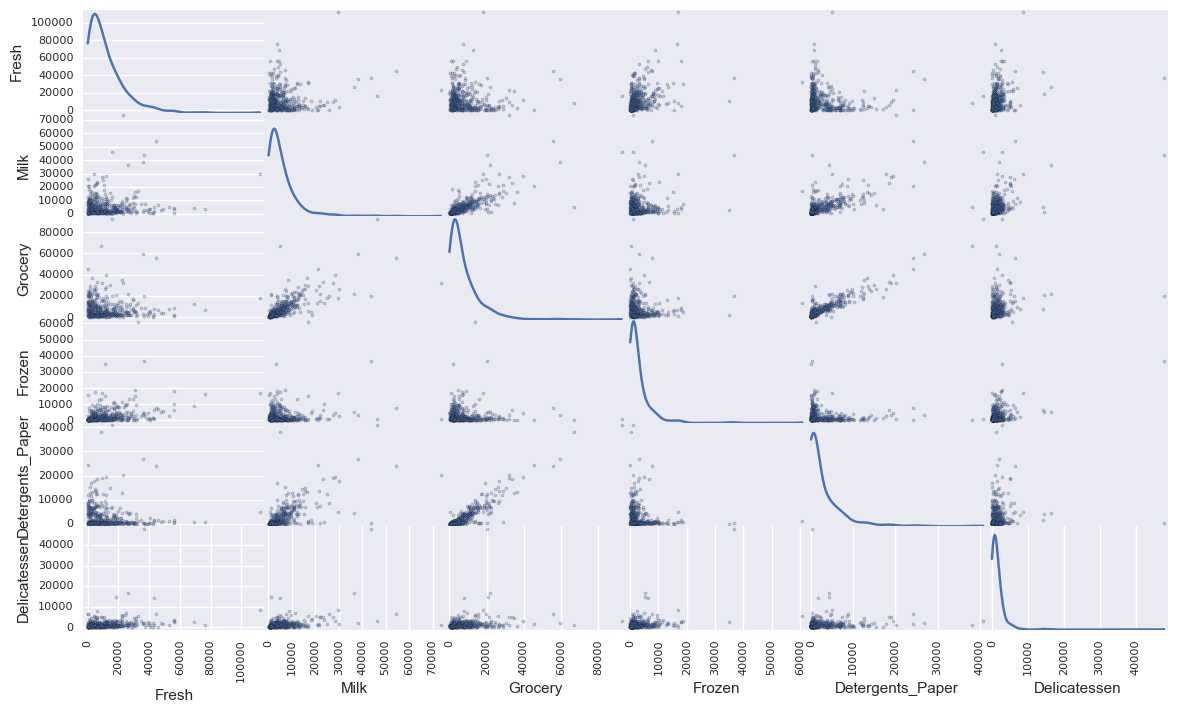

In [538]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
There are some pairs of feature which exhibit some correlation :
Grocery - Detergent_paper
Grocery - Milk
Detergents_Paper - Milk


This does confirm my suspicion about Grocery and Detergents_Paper as they  are more predicatable. But the data is not normally distirbuted and most of the data points lies in 0-10000 region.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

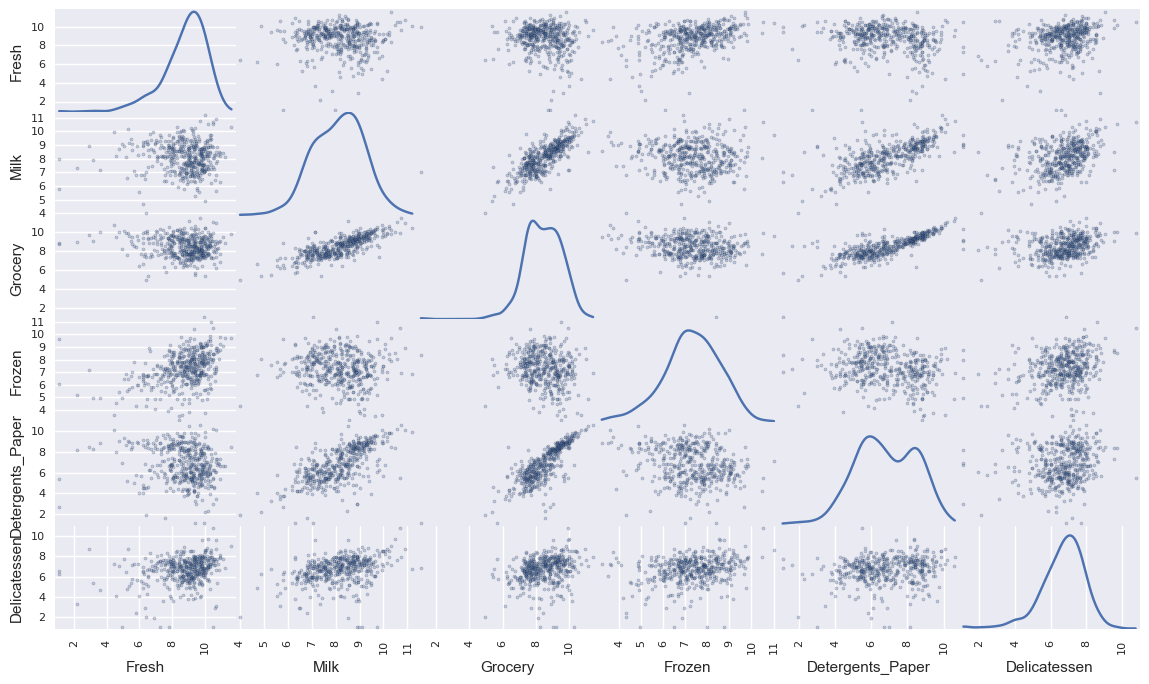

In [539]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)


# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [540]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
1,7.299121,9.614605,9.386308,6.495266,8.266421,8.162801
2,9.247540,9.796570,8.465479,8.452335,7.344073,8.091015


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [541]:
# For each feature find the data points with extreme high or low values
outliers = []
from collections import Counter
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    all_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]    
# OPTIONAL: Select the indices for data points you wish to remove
    outliers =outliers + all_outliers.index.tolist()


# Remove the outliers, if any were specified
o = Counter(outliers)
good_data = log_data.drop(log_data.index[[int(i[0]) for i in o.most_common(5)]]).reset_index(drop = True)
outlier = [int(i[0]) for i in o.most_common(5)]
outlier

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[154, 128, 65, 66, 75]

In [542]:
print "Outlier common to more than one feature are :" ,
print  o.most_common(6)

Outlier common to more than one feature are : [(154, 3), (128, 2), (65, 2), (66, 2), (75, 2), (193, 1)]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Yes there are few data point which are consider outlier for more than one feature. They are 154,128,65,66,75. 
So I added these data points to outlier list in order to remove it from data set. 

Reference: http://www.sciencedirect.com/science/article/pii/S0026265X12000872

In the classic PCA approach, the first principal component corresponds to the direction in which the projected observations have the largest variance. The second component is then orthogonal to the first and again maximizes the variance of the data points projected on it. If this procedure is further used, all the principal components can be obtained, which correspond to the eigenvectors of the empirical covariance matrix. Unfortunately, both the classic variance (which is being maximized) and the classic covariance matrix (which is being decomposed) are very sensitive to anomalous observations. Consequently, the first components are often attracted toward outlying points and thus may not capture the variation of the regular observations. Therefore, data reduction based on classic PCA becomes unreliable if outliers are present in the data.

Also clustering can be affected by outliers:
K-means: we construct clusters by computing cluster-centers as the averages of all data points belonging to a cluster. Since the average is not a robust measure of centrality, outliers will have huge impacts.

Gaussian Mixture Models: We fit multivariate normal distributions to describe clusters. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

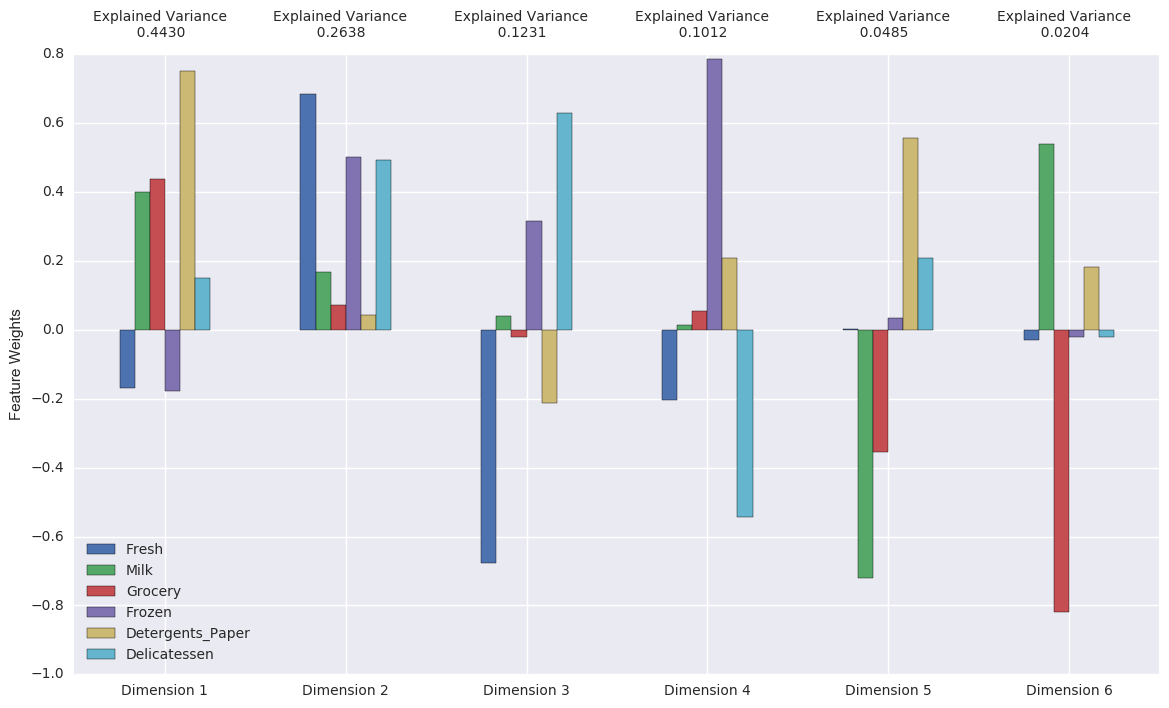

In [543]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from  sklearn.decomposition import PCA 
pca = PCA(n_components=len(good_data.columns))
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

Total variance explain by First and Second component is 0.4430+0.2638 is 0.7068 so about 70% varince explained.

First four components 0.4433 + 0.2638 + 0.1231 + 0.1012 = 0.9314, so about 93% varience overall.

Component 1:Detergent_paper has significantly higher positive weight 0.7, after that Grocery and Milk has meainingful weight which is greater that 0.4. So component can be describe as spending on **Market/Retail goods**

Component 2: Fresh has significantly higher positive weight 0.65, after that Frozen and Delicatessen has meainingful weight which is greater that 0.4. So component can be describe as spending on **Hotel/resturant**

Component 3: Delicatessen has significantly higher positive weight 0.62, after that Frozen has meainingful weight which is 0.3, and strong negative weight of Fresh (-0.65) So component can be describe as spending on Retail with more **Deli Food**

Component 4: Frozen has significantly higher positive weight 0.8, after that Detergetn_paper has positive weight which is 0.2, and strong negative weight of Delicatessen (-0.6) So component can be describe as spending on **Convenience store**



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [544]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1286,-0.2629,-1.3162,-0.5369,0.4836,-0.1097
1,2.7186,-0.3198,1.3868,-0.7698,-0.3031,0.3414
2,1.0094,1.8870,0.8590,0.1660,-0.5667,0.9315


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [545]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [546]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.1286,-0.2629
1,2.7186,-0.3198
2,1.0094,1.8870


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

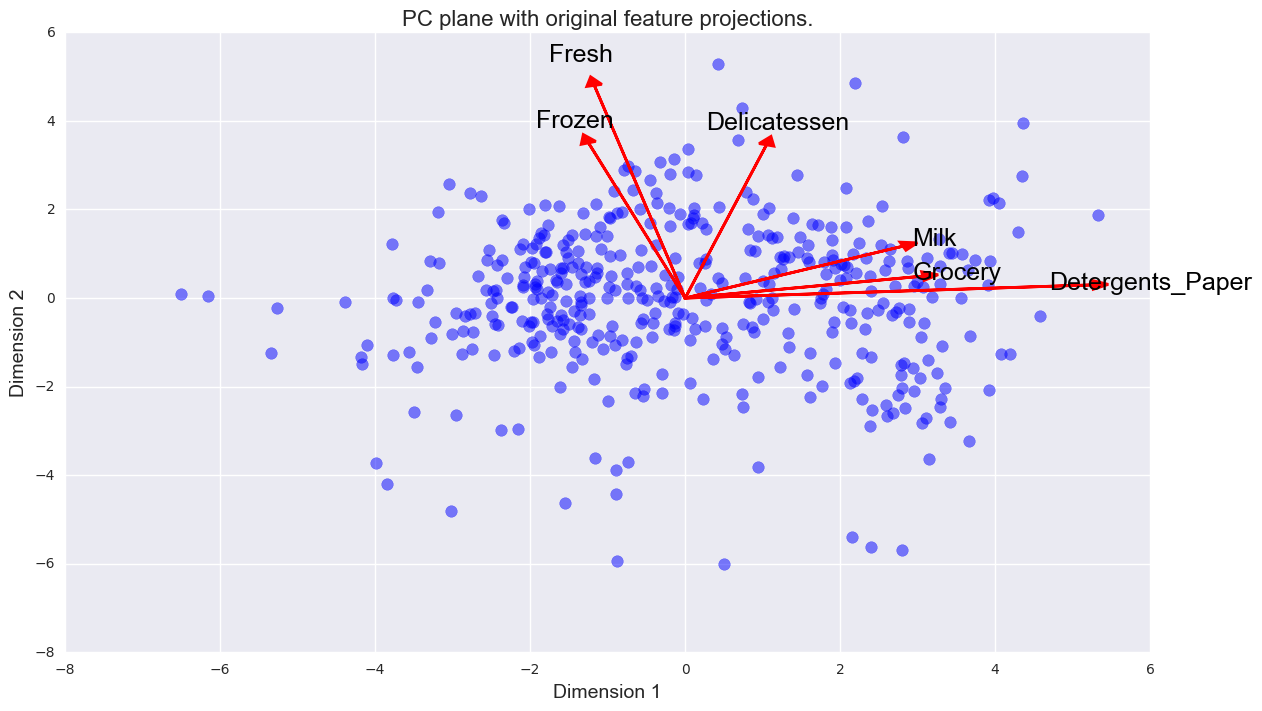

In [547]:
# Create a biplot
vs.biplot(log_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
Reference : https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
K-Means Clustering:

It is an algorithm, which classifies samples based on attributes/features into K number of clusters. Clustering or grouping of samples is done by minimizing the distance between sample and the centroid. i.e. Assign the centroid and optimize the centroid based on the distances from the points to it. This is called as Hard Assignment i.e. We are certain that particular points belong to particular centroid and then based on the least squares distance method, we will optimize the place of the centroid.

Advantages of K-Means:

1. Running Time

2. Better for high dimensional data.

3. Easy to interpret and Implement.

Disadvantages of K-Means:

1. Assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear)

2. Hard Assignment might lead to mis grouping.

Guassian Mixture:

Instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster.

Advantages:

1. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.

2. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).

Disadvantages:

1. Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.

2. Difficult to interpret.

In our example of cutomer segment, we cant be sure about the cluster or which group each of them belong. 
i.e with high spending on fresh and deli the cluster can be Deli or hotel restuarant or cafe. So there is a uncertainty. So I believe I would like to use Guassian Mixture to given data.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [548]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
    
def score_clustering(data, num_clusters):
    preds,_,_  = cluster(data, num_clusters)
    score = silhouette_score(data, preds)
    return score

def cluster(data, num_clusters):
    clusterer = GMM(n_components=num_clusters,random_state=42).fit(data)
    preds = clusterer.predict(data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    return preds,centers,sample_preds
    
for num_clusters in range(2,15):
    score = score_clustering(reduced_data, num_clusters)
    print("num_clusters: {} - score: {}".format(num_clusters, score))

num_clusters: 2 - score: 0.411818864386
num_clusters: 3 - score: 0.373560747175
num_clusters: 4 - score: 0.331389093566
num_clusters: 5 - score: 0.280983407051
num_clusters: 6 - score: 0.277981985023
num_clusters: 7 - score: 0.322542962762
num_clusters: 8 - score: 0.309424058313
num_clusters: 9 - score: 0.314964371012
num_clusters: 10 - score: 0.317636137545
num_clusters: 11 - score: 0.263607285733
num_clusters: 12 - score: 0.27170095306
num_clusters: 13 - score: 0.269985259937
num_clusters: 14 - score: 0.250647686338


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

num_clusters: 2 - score: 0.411818864386
num_clusters: 3 - score: 0.373560747175
num_clusters: 4 - score: 0.331389093566
num_clusters: 5 - score: 0.280983407051
num_clusters: 6 - score: 0.277981985023
num_clusters: 7 - score: 0.322542962762
num_clusters: 8 - score: 0.309424058313
num_clusters: 9 - score: 0.314964371012
num_clusters: 10 - score: 0.317636137545
num_clusters: 11 - score: 0.263607285733
num_clusters: 12 - score: 0.27170095306
num_clusters: 13 - score: 0.269985259937
num_clusters: 14 - score: 0.250647686338

when cluster size is 2 it give best result

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

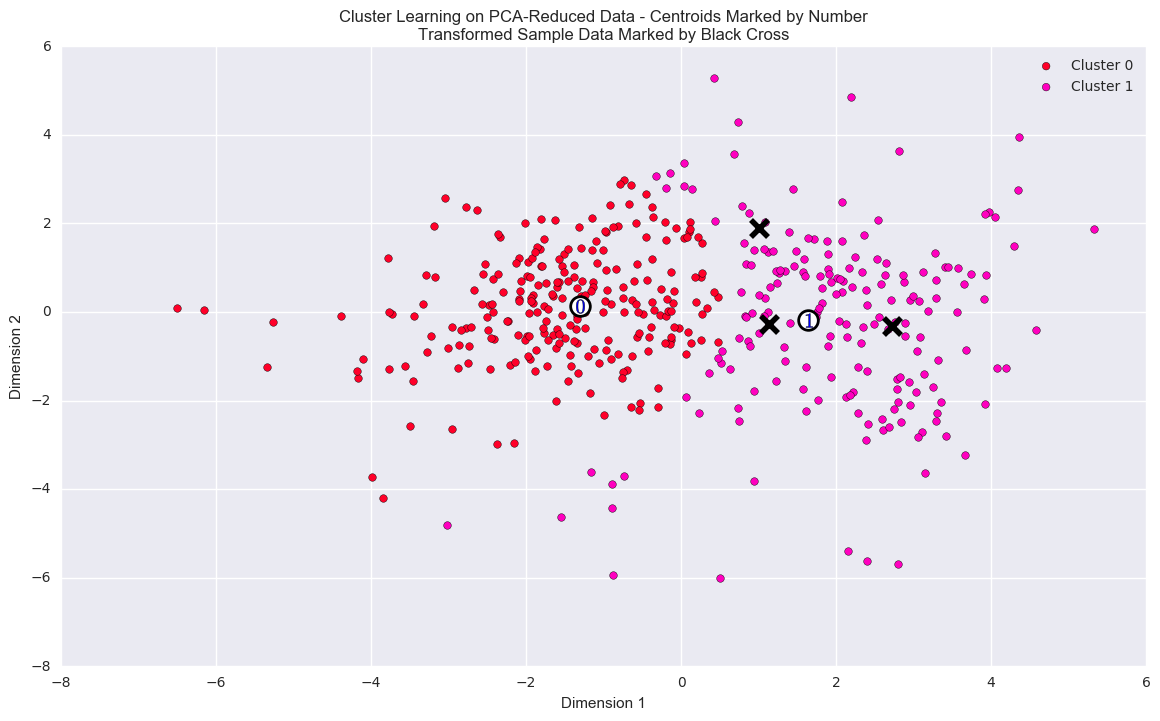

In [549]:
# Display the results of the clustering from implementation
preds,centers,sample_pred = cluster(reduced_data,2)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [550]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

display(true_centers - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,308.0,-1575.0,-2067.0,532.0,-479.0,-254.0
Segment 1,-4188.0,2720.0,4799.0,-490.0,2230.0,-21.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 0 has above-median spendings on Fresh and Frozen, below-median spendings on Milk, Grocery and Detergents Paper ,Delicatessen. This could be a profile of restaurants selling mostly fresh food but also a bit of frozen food as well as Delicatessen. Segment 1 has above-median spendings on Milk, Grocery and Detergents & Paper, low spendings on Fresh food and average spendings on Delicatessen. This could be the profile of a retail store.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [551]:
# Display the predictions
for i, preds in enumerate(sample_pred):
    print "Sample point", i, "predicted to be in Cluster", preds
    
display(samples)  
display(true_centers)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12126,3199,6975,480,3140,545
1,1479,14982,11924,662,3891,3508
2,10379,17972,4748,4686,1547,3265


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


**Answer:**

Client 6 : I had guessed this as Convenience store, and now it is assigned to cluster which I consider to be retail store so my guess was in line. Client 6 purchaing pattern although shows higher cost of Fresh product, lowest cost for  Frozen similarly to segment 1. 

Client 315 :I had guessed this as a Deli/Cafe. and now it is assigned to cluster which I consider to be retail store so my guess was not in line. Client 315 purchaing pattern shows higher cost of Delicatessen product, lowest cost for Fresh and Frozen and higher grocery cost similarly to segment 1 . 

Client 254 :I had guessed this Retail food, and now it is assigned to cluster which I consider to be retail store so my guess was in line. Client 254 purchaing pattern shows higher cost of Fresh, Frozen, Delicatessen product, lowest cost for Detergent_paper looking at the cluster center now i feel It should have falled into segment 0 . 



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Considering both the segments, segment 0 customer spend most on Fresh products. Fresh product are supposed to be delivered on time as they are perishible ones. So I believe segment 0 customer will react negatively to change in delivery service.

Segment 2 cutomer spend most on Milk, Grocery and detergent-paper , these are kind of product that can be stocked and we dont buy them on day to day basis. So these customer might react positively to this change.  

But as this change is being made without giveing any additional benifits in exchange. Plus reatail sotre might not like to keep stock to reduce cost of storage. So I am not 100% sure if there will be any customer react positively to this deal.

In order to determine which customers would respond positively to new delivery service, we could split the customers in 2 similar sets (setA and setB): i.e customers belonging to segment 0 would be equaly split between setA and setB, and same thing for customers of segment 1. We would then expose only one set (for example setA) to the new delivery service, and keep the service unchanged for the 2nd set of customers setB. We can then compare setA and setB to determine what group of customers that the new service affects the most. 


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** 
We can have Target variable added to each customer spending telling use if that cutomer belong to segment 0 or 1 from our finding from clustering.

We can use supervised learner to train our original data with target variables. 
Once it is trained we can use that model to predict customer segement for new cusomters. 

Other way is to use same clustering algorithem to add new point to existing cluster. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

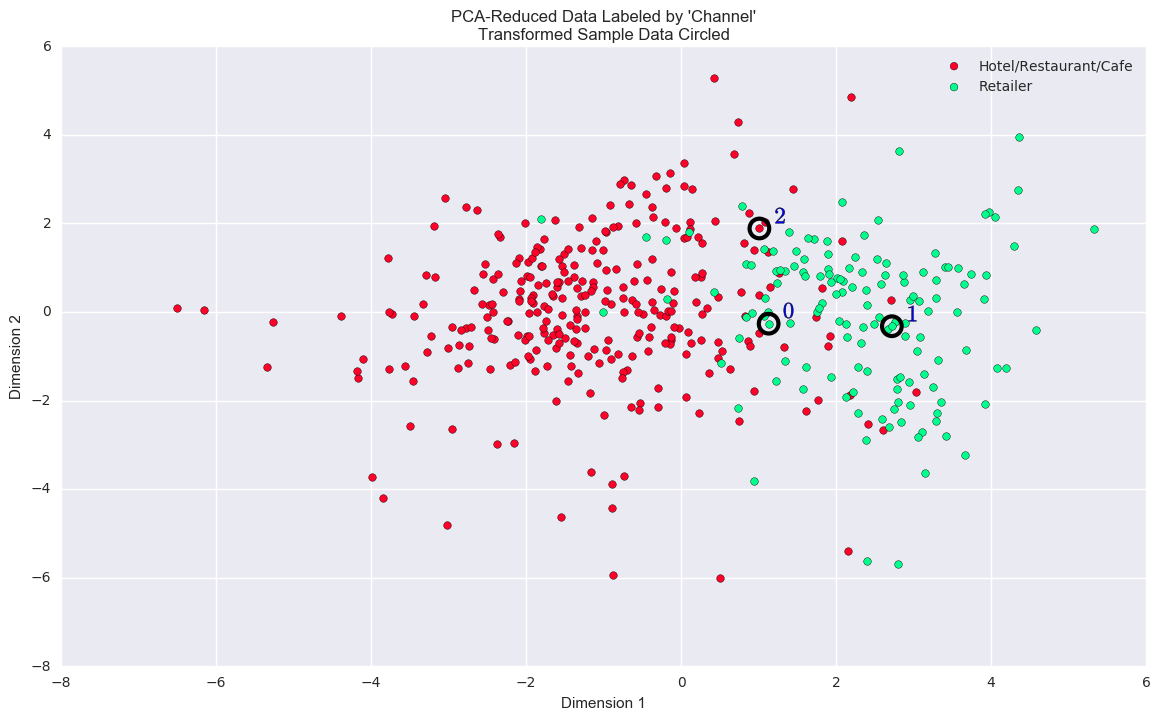

In [552]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outlier, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

It seems to perform quite well since 2 clusters are what the shilouette score recommended to use and, 2 clusters are what the underlying dataset used to grouped the customers. The clustering is consistent with what I suspected earlier about the data.

There are few data pint that could purely belong to one or other segment. But most of them are some what ambiguos and do not clearly belong to one cluster or the other. There is considerable overlap in the true distribution. I

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.